In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in data

In [2]:
df = pd.read_excel('data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


## Correcting data types

In order to prepare the data for exploratory analysis, we are going to correct the datatypes such that they are easily usable by plotting functions.

In [3]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

In [4]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

Sort data by stages to make it easier to analyze later.

In [5]:
std_stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO']
stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO', 
'Acquired', 'Private Equity …', 'Subsidi…', 'Unknown']

df["Stage_i"] = df["Stage"].apply(lambda x: stages.index(x))
df = df.sort_values(by=["Stage_i"])

Distribution of company size (given by in stage and funding) - Matthew

In [6]:
df["Money_Raised_in_$_mil"] = df["Money_Raised_in_$_mil"].apply(lambda x: float(str(x).replace("$","")))

c:\Users\Steam\miniconda3\envs\cogs108\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Count'>

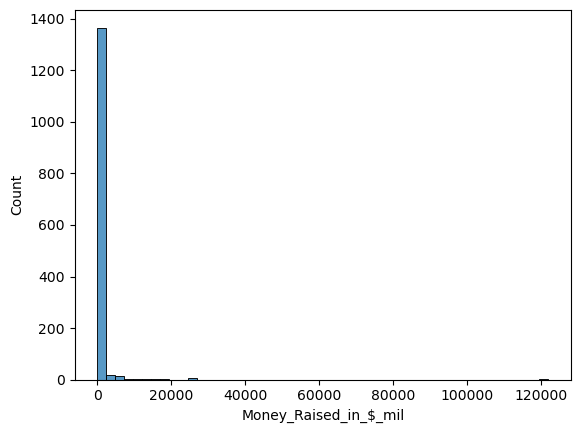

In [7]:
# sns.barplot(x="Company", y="Money_Raised_in_$_mil", data=df.sort_values(by="Money_Raised_in_$_mil"))
sns.histplot(x="Money_Raised_in_$_mil", bins=50, data=df)
# df.describe()
# note that majority of companies have funding within a really small range.

c:\Users\Steam\miniconda3\envs\cogs108\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Count'>

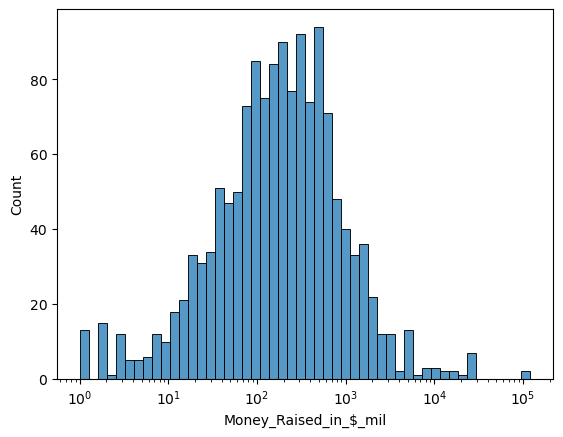

In [8]:
sns.histplot(x="Money_Raised_in_$_mil", bins=50, data=df, log_scale=True)
# well it looks like a cool bell curve when i make it log scale so awesome!!!
# idk what the implications are.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

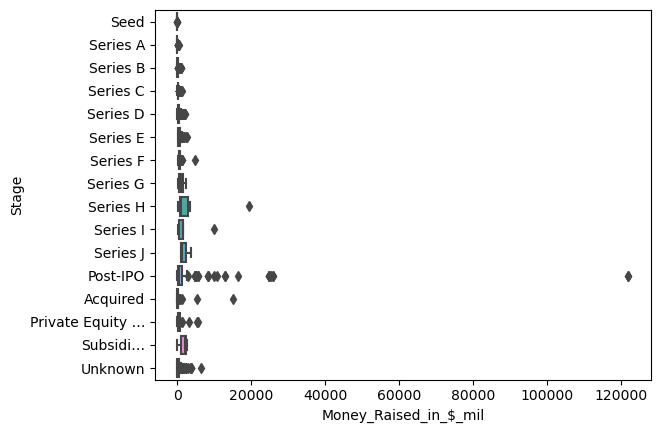

In [9]:
# df["Stage"].unique()

sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df)

Note: post ipo has a large value which makes this plot hard to read!!!
i will remove it temporarily.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

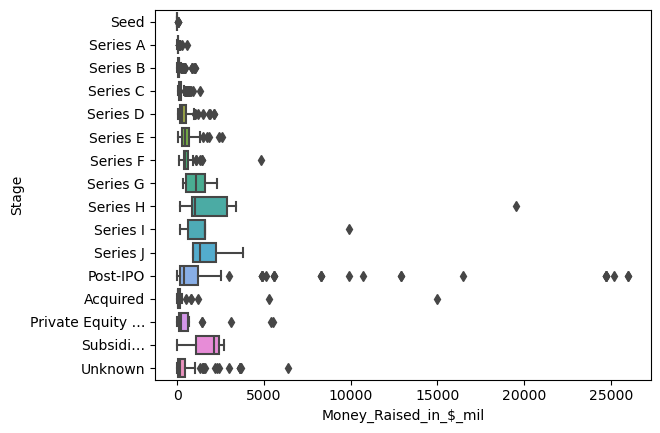

In [10]:
sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df[df["Money_Raised_in_$_mil"] < 100000])

Still kind of annoying, what if we remove outliers completely?

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

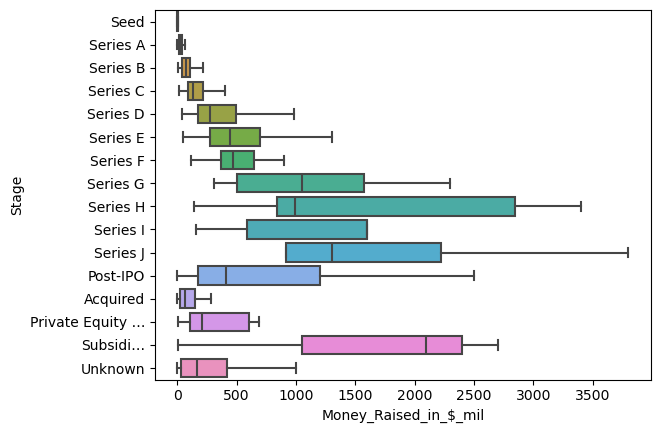

In [11]:
sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df, showfliers=False)

I guess this shows what rounds of funding -> how much money u raise.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Company_Size_before_Layoffs'>

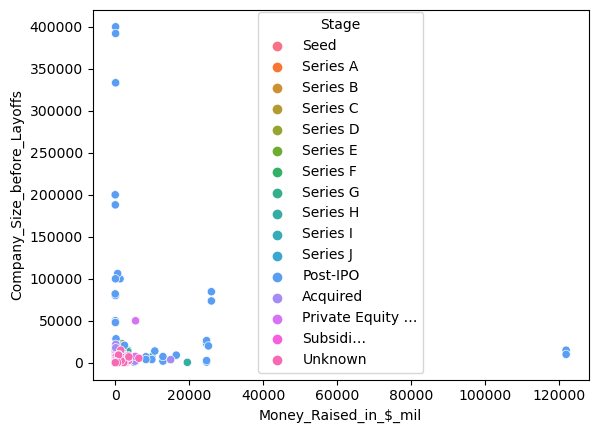

In [12]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Company_Size_before_Layoffs", hue="Stage", data=df)

Same thing but with normal stages (seed -> series -> post IPO) and log scale.
Note that a company can have any number of series stages before reaching post-IPO. Which is why we may see some high-series stages having more company size / money raised than post-ipo companies

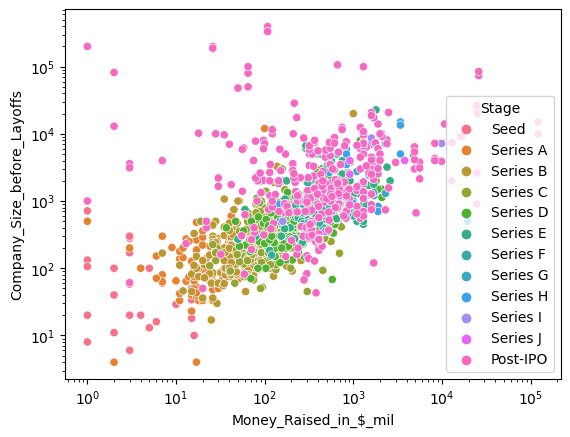

In [13]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Company_Size_before_Layoffs", hue="Stage", data=df[df["Stage"].isin(std_stages)])
plt.xscale("log")
plt.yscale("log")

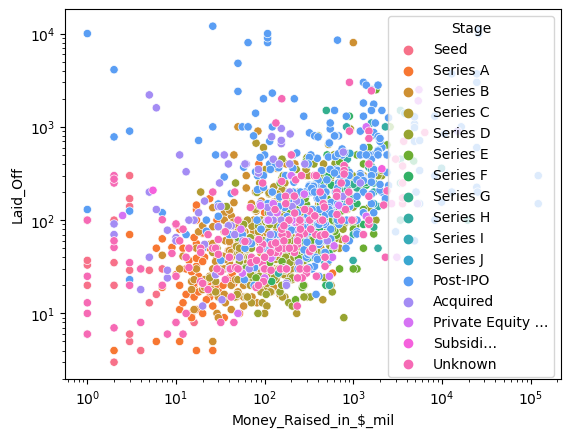

In [14]:
sns.scatterplot(x="Money_Raised_in_$_mil", y="Laid_Off", hue="Stage", data=df)
plt.xscale("log")
plt.yscale("log")
# doesnt make sense for yscale to be log too as it is a percentage

In [15]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
lat                                   float64
lng                                   float64
Funding                               float64
Stage_i                                 int64
dtype: object

In [16]:
df.Country.value_counts()

Country
USA                        905
India                      101
Canada                      79
Israel                      52
Germany                     51
United Kingdom              49
Brazil                      48
Australia                   26
Singapore                   19
Sweden                      14
Indonesia                    8
Kenya                        6
France                       6
Ireland                      5
United Arabian Emirates      5
Nigeria                      4
Estonia                      4
Argentina                    3
New Zealand                  3
Denmark                      3
Hong Kong                    3
China                        3
Norway                       2
Malaysia                     2
Chile                        2
Spain                        2
Mexico                       2
Netherlands                  2
Austria                      1
South Korea                  1
Portugal                     1
Finland                      1


In [17]:
df.Year.value_counts().reset_index().sort_values(by="Year")

,Year,count
2,2020,333
4,2021,14
0,2022,579
1,2023,476
3,2024,16


In [18]:
df["Industry"].value_counts()

Industry
Finance           200
Retail            117
Healthcare        104
Transportation     92
Food               90
Marketing          84
Other              80
Consumer           66
Real Estate        57
Security           54
Crypto             52
Education          51
Data               48
Media              47
HR                 39
Travel             37
Logistics          30
Sales              27
Recruiting         24
Product            22
Support            22
Infrastructure     20
Fitness            17
Construction        9
Legal               7
Hardware            7
Energy              5
Aerospace           5
Manufacturing       3
AI                  2
Name: count, dtype: int64

In [31]:
import json
d = json.load(open("resp.json"))
jtab = d["data"]["table"]
j_entries = jtab["rows"]
# id createdTime cellValuesByColumnId...
for i in j_entries:
    i.update(i["cellValuesByColumnId"])
    i.pop("cellValuesByColumnId")
    
df2 = pd.DataFrame.from_records(j_entries)
[i["name"] for i in jtab["columns"]]

['Company',
 'Location HQ',
 '# Laid Off',
 'Date',
 '%',
 'Industry',
 'Source',
 'List of Employees Laid Off',
 'Stage',
 '$ Raised (mm)',
 'Country',
 'Date Added']

In [32]:
## don't run this cell twice please.
# map columns to their eng names
df2cols = {}
for i in jtab["columns"]:
    # id: company
    df2cols[i["id"]] = i["name"]
# df2cols

df2c = list(df2.columns)

for i in range(len(df2c)):
    if df2c[i] in df2cols:
        df2c[i] = df2cols[df2c[i]]

df2.columns = df2c
# df2

lmap = jtab["columns"][1]["typeOptions"]["choices"]
df2["Location HQ"] = df2["Location HQ"].apply(lambda x: " ".join([lmap[i]["name"] if i in lmap else i for i in x]) if (isinstance(x, list)) else print("weird value in loc hq", x))
lmap = jtab["columns"][8]["typeOptions"]["choices"]
df2["Stage"] = df2["Stage"].apply(lambda x: (lmap[x]["name"] if x in lmap else x) if (isinstance(x, str)) else print("weird value in stage", x))
lmap = jtab["columns"][10]["typeOptions"]["choices"]
df2["Country"] = df2["Country"].apply(lambda x: (lmap[x]["name"] if x in lmap else x) if (isinstance(x, str)) else print("weird value in country", x))
lmap = jtab["columns"][5]["typeOptions"]["choices"]
df2["Industry"] = df2["Industry"].apply(lambda x: (lmap[x]["name"] if x in lmap else x) if (isinstance(x, str)) else print("weird value in industry", x))
df2.head()

weird value in loc hq nan
weird value in stage nan
weird value in stage nan
weird value in stage nan
weird value in stage nan
weird value in stage nan
weird value in stage nan
weird value in stage nan
weird value in industry nan


,id,createdTime,Company,Location HQ,Industry,# Laid Off,Date,Source,$ Raised (mm),Stage,Date Added,Country,%,List of Employees Laid Off
0,recMLtLMS7rdqtRRC,2024-02-24T01:34:17.000Z,Redesign Health,New York City,Healthcare,77.0,2024-02-23T00:00:00.000Z,https://www.crainsnewyork.com/health-pulse/uni...,315.0,Series C,2024-02-24T01:34:17.000Z,United States,NaN,NaN
1,recVvAOCTNB0crBCw,2024-02-24T01:33:51.000Z,Carbon Health,SF Bay Area,Healthcare,56.0,2024-02-23T00:00:00.000Z,https://www.sfchronicle.com/bayarea/article/ba...,522.0,Series D,2024-02-24T01:33:51.000Z,United States,NaN,NaN
2,recltW5OETeb1DM3o,2024-02-24T01:55:05.000Z,Vice Media,New York City,Media,NaN,2024-02-22T00:00:00.000Z,https://www.nytimes.com/2024/02/22/business/vi...,1600.0,Unknown,2024-02-24T01:55:05.000Z,United States,NaN,NaN
3,recE1HenHF7zzgPYB,2024-02-22T05:51:24.000Z,Affirm,Pittsburgh,Finance,60.0,2024-02-21T00:00:00.000Z,https://bnnbreaking.com/finance-nav/affirms-pi...,1500.0,Post-IPO,2024-02-22T05:51:24.000Z,United States,NaN,NaN
4,recSf9an9yqAS1cUM,2024-02-22T05:50:06.000Z,Finder,Sydney Non-U.S.,Retail,60.0,2024-02-21T00:00:00.000Z,https://www.startupdaily.net/topic/business/fi...,30.0,Unknown,2024-02-22T05:50:06.000Z,Australia,0.17,NaN
